In [246]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [194]:
dataset=pd.read_csv('E:/csv/auto-mpg.csv')
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [195]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [196]:
dataset.describe()


,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [197]:
dataset=dataset.drop(['car name'],axis=1)
dataset.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [198]:
dataset.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
dtype: int64

In [199]:
print(dataset.cylinders.unique())
print(dataset.origin.unique())

[8 4 6 3 5]
[1 3 2]


In [200]:
def cylinder_map(x):
    return x.map({3:"cyl_3",5:"cyl_5",6:"cyl_6",4:"cyl_4",8:"cyl_8"})
dataset[['cylinders']]=dataset[['cylinders']].apply(cylinder_map)
dataset.head()
cylinders=pd.get_dummies(dataset.cylinders,drop_first=True)
cylinders.head(5)

,cyl_4,cyl_5,cyl_6,cyl_8
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [201]:
def origin_map(x):
    return x.map({3:"origin_x",2:"origin_y",1:"origin_z"})
dataset[['origin']]=dataset[["origin"]].apply(origin_map)
dataset.head()
origin=pd.get_dummies(dataset.origin,drop_first=True)
origin.head(5)

,origin_y,origin_z
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [202]:
dataset=pd.concat([dataset,cylinders,origin],axis=1)
dataset.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,cyl_4,cyl_5,cyl_6,cyl_8,origin_y,origin_z
0,18.0,cyl_8,307.0,130,3504,12.0,70,origin_z,0,0,0,1,0,1
1,15.0,cyl_8,350.0,165,3693,11.5,70,origin_z,0,0,0,1,0,1
2,18.0,cyl_8,318.0,150,3436,11.0,70,origin_z,0,0,0,1,0,1
3,16.0,cyl_8,304.0,150,3433,12.0,70,origin_z,0,0,0,1,0,1
4,17.0,cyl_8,302.0,140,3449,10.5,70,origin_z,0,0,0,1,0,1


In [203]:
dataset=dataset.drop(['cylinders','origin'],axis=1)
dataset.head(5)

,mpg,displacement,horsepower,weight,acceleration,model year,cyl_4,cyl_5,cyl_6,cyl_8,origin_y,origin_z
0,18.0,307.0,130,3504,12.0,70,0,0,0,1,0,1
1,15.0,350.0,165,3693,11.5,70,0,0,0,1,0,1
2,18.0,318.0,150,3436,11.0,70,0,0,0,1,0,1
3,16.0,304.0,150,3433,12.0,70,0,0,0,1,0,1
4,17.0,302.0,140,3449,10.5,70,0,0,0,1,0,1


In [204]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    object 
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   cyl_4         398 non-null    uint8  
 7   cyl_5         398 non-null    uint8  
 8   cyl_6         398 non-null    uint8  
 9   cyl_8         398 non-null    uint8  
 10  origin_y      398 non-null    uint8  
 11  origin_z      398 non-null    uint8  
dtypes: float64(3), int64(2), object(1), uint8(6)
memory usage: 21.1+ KB


In [205]:
dataset.horsepower.values# has some undefined values

array(['130', '165', '150', '150', '140', '198', '220', '215', '225',
       '190', '170', '160', '150', '225', '95', '95', '97', '85', '88',
       '46', '87', '90', '95', '113', '90', '215', '200', '210', '193',
       '88', '90', '95', '?', '100', '105', '100', '88', '100', '165',
       '175', '153', '150', '180', '170', '175', '110', '72', '100', '88',
       '86', '90', '70', '76', '65', '69', '60', '70', '95', '80', '54',
       '90', '86', '165', '175', '150', '153', '150', '208', '155', '160',
       '190', '97', '150', '130', '140', '150', '112', '76', '87', '69',
       '86', '92', '97', '80', '88', '175', '150', '145', '137', '150',
       '198', '150', '158', '150', '215', '225', '175', '105', '100',
       '100', '88', '95', '46', '150', '167', '170', '180', '100', '88',
       '72', '94', '90', '85', '107', '90', '145', '230', '49', '75',
       '91', '112', '150', '110', '122', '180', '95', '?', '100', '100',
       '67', '80', '65', '75', '100', '110', '105', '140', '1

In [206]:
dataset=dataset.replace('?','NaN')
dataset['horsepower']=dataset['horsepower'].astype(float)
m=dataset['horsepower'].mean()
m

104.46938775510205

In [207]:
dataset['horsepower']=dataset['horsepower'].fillna(m)
dataset['horsepower'].values

array([130.        , 165.        , 150.        , 150.        ,
       140.        , 198.        , 220.        , 215.        ,
       225.        , 190.        , 170.        , 160.        ,
       150.        , 225.        ,  95.        ,  95.        ,
        97.        ,  85.        ,  88.        ,  46.        ,
        87.        ,  90.        ,  95.        , 113.        ,
        90.        , 215.        , 200.        , 210.        ,
       193.        ,  88.        ,  90.        ,  95.        ,
       104.46938776, 100.        , 105.        , 100.        ,
        88.        , 100.        , 165.        , 175.        ,
       153.        , 150.        , 180.        , 170.        ,
       175.        , 110.        ,  72.        , 100.        ,
        88.        ,  86.        ,  90.        ,  70.        ,
        76.        ,  65.        ,  69.        ,  60.        ,
        70.        ,  95.        ,  80.        ,  54.        ,
        90.        ,  86.        , 165.        , 175.  

In [208]:
x=dataset.iloc[:,1:]
y=dataset.iloc[:,0]

In [209]:
x

,displacement,horsepower,weight,acceleration,model year,cyl_4,cyl_5,cyl_6,cyl_8,origin_y,origin_z
0,307.0,130.0,3504,12.0,70,0,0,0,1,0,1
1,350.0,165.0,3693,11.5,70,0,0,0,1,0,1
2,318.0,150.0,3436,11.0,70,0,0,0,1,0,1
3,304.0,150.0,3433,12.0,70,0,0,0,1,0,1
4,302.0,140.0,3449,10.5,70,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
393,140.0,86.0,2790,15.6,82,1,0,0,0,0,1
394,97.0,52.0,2130,24.6,82,1,0,0,0,1,0
395,135.0,84.0,2295,11.6,82,1,0,0,0,0,1
396,120.0,79.0,2625,18.6,82,1,0,0,0,0,1


## Building our model


This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

RFE
Recursive feature elimination

In [210]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [211]:
print(x_train.shape)
print(y_train.shape)

(318, 11)
(318,)


In [212]:
from sklearn.linear_model import LinearRegression

In [213]:
from sklearn.feature_selection import RFE

In [214]:
# Running RFE with the output number of the variable equal to 8
lm=LinearRegression()
lm.fit(x_train,y_train)

rfe=RFE(lm,n_features_to_select=8)
rfe=rfe.fit(x_train,y_train)

In [215]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('displacement', False, 3),
 ('horsepower', False, 2),
 ('weight', False, 4),
 ('acceleration', True, 1),
 ('model year', True, 1),
 ('cyl_4', True, 1),
 ('cyl_5', True, 1),
 ('cyl_6', True, 1),
 ('cyl_8', True, 1),
 ('origin_y', True, 1),
 ('origin_z', True, 1)]

In [216]:
col=x_train.columns[rfe.support_]
col

Index(['acceleration', 'model year', 'cyl_4', 'cyl_5', 'cyl_6', 'cyl_8',
       'origin_y', 'origin_z'],
      dtype='object')

In [217]:
x_train.columns[~rfe.support_]

Index(['displacement', 'horsepower', 'weight'], dtype='object')

## Building model using statsmodel, for the detailed statistics

In [218]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe=x_train[col]

In [219]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

In [220]:
ols = sm.OLS(y_train,x_train_rfe).fit()   # Running the linear model

In [221]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     130.3
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           2.94e-94
Time:                        20:53:36   Log-Likelihood:                -869.75
No. Observations:                 318   AIC:                             1758.
Df Residuals:                     309   BIC:                             1791.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -32.4640      5.290     -6.137   

In [222]:
x=x.drop(['cyl_8'],axis=1)

In [223]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=100)
x_train.head(5)

,displacement,horsepower,weight,acceleration,model year,cyl_4,cyl_5,cyl_6,origin_y,origin_z
149,120.0,97.0,2489,15.0,74,1,0,0,0,0
118,116.0,75.0,2158,15.5,73,1,0,0,1,0
287,351.0,138.0,3955,13.2,79,0,0,0,0,1
187,305.0,140.0,4215,13.0,76,0,0,0,0,1
190,351.0,152.0,4215,12.8,76,0,0,0,0,1


In [224]:
import statsmodels.api as sm
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()
lr.params

const          -20.630459
displacement     0.028113
horsepower      -0.026888
weight          -0.006279
acceleration     0.056908
model year       0.780156
cyl_4            3.495339
cyl_5            3.551782
cyl_6           -0.470494
origin_y        -0.624605
origin_z        -2.524503
dtype: float64

In [225]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     158.2
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          9.09e-115
Time:                        20:53:37   Log-Likelihood:                -818.62
No. Observations:                 318   AIC:                             1659.
Df Residuals:                     307   BIC:                             1701.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -20.6305      5.035     -4.097   

In [226]:
x=x.drop(['acceleration'],axis=1)

In [227]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=100)
x_train.head(5)

,displacement,horsepower,weight,model year,cyl_4,cyl_5,cyl_6,origin_y,origin_z
149,120.0,97.0,2489,74,1,0,0,0,0
118,116.0,75.0,2158,73,1,0,0,1,0
287,351.0,138.0,3955,79,0,0,0,0,1
187,305.0,140.0,4215,76,0,0,0,0,1
190,351.0,152.0,4215,76,0,0,0,0,1


In [228]:
import statsmodels.api as sm
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()
lr.params

const          -19.570094
displacement     0.027905
horsepower      -0.031379
weight          -0.006118
model year       0.777436
cyl_4            3.590207
cyl_5            3.665465
cyl_6           -0.403545
origin_y        -0.622989
origin_z        -2.534807
dtype: float64

In [229]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     176.2
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          7.66e-116
Time:                        20:53:38   Log-Likelihood:                -818.77
No. Observations:                 318   AIC:                             1658.
Df Residuals:                     308   BIC:                             1695.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -19.5701      4.622     -4.234   

In [230]:

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,weight,121.39
3,model year,89.14
0,displacement,67.77
1,horsepower,48.97
4,cyl_4,16.34
8,origin_z,7.06
6,cyl_6,3.40
7,origin_y,2.24
5,cyl_5,1.30


In [231]:
#removing origin_y

In [232]:
x=x.drop(['origin_y'],axis=1)

In [233]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=100)
x_train.head(5)

,displacement,horsepower,weight,model year,cyl_4,cyl_5,cyl_6,origin_z
149,120.0,97.0,2489,74,1,0,0,0
118,116.0,75.0,2158,73,1,0,0,0
287,351.0,138.0,3955,79,0,0,0,1
187,305.0,140.0,4215,76,0,0,0,1
190,351.0,152.0,4215,76,0,0,0,1


In [234]:
import statsmodels.api as sm
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()
print(lr.params)
print(lr.summary())


const          -20.339066
displacement     0.028033
horsepower      -0.030640
weight          -0.006247
model year       0.788690
cyl_4            3.395891
cyl_5            3.243956
cyl_6           -0.496208
origin_z        -2.219494
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     198.0
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          8.75e-117
Time:                        20:53:40   Log-Likelihood:                -819.29
No. Observations:                 318   AIC:                             1657.
Df Residuals:                     309   BIC:                             1690.
Df Model:                           8                                         
Covariance Type:            nonrobust   

In [235]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,weight,116.27
3,model year,87.74
0,displacement,67.77
1,horsepower,48.96
4,cyl_4,15.40
7,origin_z,5.20
6,cyl_6,3.30
5,cyl_5,1.25


In [236]:
#removing cyl_5

In [237]:
x=x.drop(['cyl_5'],axis=1)

In [238]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=100)
x_train.head(5)

,displacement,horsepower,weight,model year,cyl_4,cyl_6,origin_z
149,120.0,97.0,2489,74,1,0,0
118,116.0,75.0,2158,73,1,0,0
287,351.0,138.0,3955,79,0,0,1
187,305.0,140.0,4215,76,0,0,1
190,351.0,152.0,4215,76,0,0,1


In [239]:
import statsmodels.api as sm
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()
print(lr.params)
print(lr.summary())

const          -19.864052
displacement     0.025986
horsepower      -0.033147
weight          -0.006143
model year       0.793194
cyl_4            2.782798
cyl_6           -0.880240
origin_z        -2.294047
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     225.0
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          1.87e-117
Time:                        20:53:44   Log-Likelihood:                -820.53
No. Observations:                 318   AIC:                             1657.
Df Residuals:                     310   BIC:                             1687.
Df Model:                           7                                         
Covariance Type:            nonrobust                             

In [240]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,weight,114.87
3,model year,80.88
0,displacement,65.44
1,horsepower,48.22
4,cyl_4,13.20
6,origin_z,5.15
5,cyl_6,2.97


In [252]:
x=x.drop(['cyl_6'],axis=1)

In [253]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=100)
x_train.head(5)

,displacement,horsepower,weight,model year,cyl_4,origin_z
149,120.0,97.0,2489,74,1,0
118,116.0,75.0,2158,73,1,0
287,351.0,138.0,3955,79,0,1
187,305.0,140.0,4215,76,0,1
190,351.0,152.0,4215,76,0,1


In [254]:
import statsmodels.api as sm
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()
print(lr.params)
print(lr.summary())

const          -21.367468
displacement     0.027975
horsepower      -0.029707
weight          -0.006110
model year       0.794899
cyl_4            3.636046
origin_z        -2.429147
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     261.8
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          2.31e-118
Time:                        20:57:49   Log-Likelihood:                -821.29
No. Observations:                 318   AIC:                             1657.
Df Residuals:                     311   BIC:                             1683.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
             

In [255]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,weight,114.80
0,displacement,62.12
3,model year,52.77
1,horsepower,46.60
4,cyl_4,6.64
5,origin_z,4.96


Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [256]:
y_train_pred=lr.predict(x_train_sm)

C:\Users\Nazim Islam\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

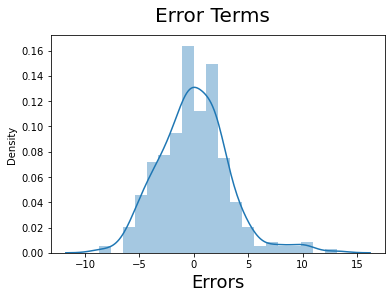

In [257]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

 Model Evaluation

In [258]:
x_test_sm=sm.add_constant(x_test)

In [259]:
y_pred=lr.predict(x_test_sm)

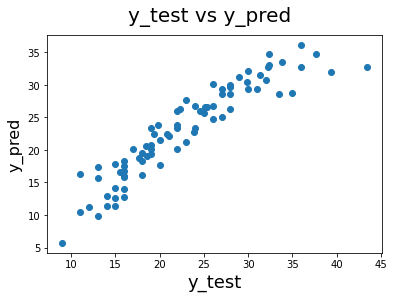

In [260]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                     
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [261]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     261.8
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          2.31e-118
Time:                        20:58:23   Log-Likelihood:                -821.29
No. Observations:                 318   AIC:                             1657.
Df Residuals:                     311   BIC:                             1683.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -21.3675      4.392     -4.865   